# Demo: Global Projection Tradeoffs and Map Distortion - Tissot example
UW Geospatial Data Analysis  
CEE498/CEWA599  
David Shean

All map projections distort area, distance, and angle.  The cartogrophers job is to select the best projection for the data and objectives of the map.

We're not going to get into `cartopy` this week, but the following code uses `cartopy` to reproduce the classic [Tissot indicatrix](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix) example, which helps to visualize distortion in different global projections.

For the plots below, each circle has a uniform radius of 500 km, and they are distributed uniformly across the globe every 20° of latitude and longitude. Each projection distorts these circles and their relative spacing.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

In [2]:
#Turn off warnings from cartopy
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Function to create cartopy plot with Tissot circles for input crs
def tissotplot(crs):
    #Create figure and axes
    fig, ax = plt.subplots(subplot_kw={'projection': crs}, figsize=(8,8))
    #Define positions of the circles, spaced every 20 degrees
    lons = range(-180, 180, 20)
    #lats = range(-90, 90, 20)
    lats = range(-80, 81, 20)
    #Draw coastlines
    ax.coastlines()
    #Add gridlines
    gl = ax.gridlines(draw_labels=True, auto_inline=True, alpha=0.5, lw=0.5, linestyle=':')
    gl.xlocator = mticker.FixedLocator(lons)
    gl.ylocator = mticker.FixedLocator(lats)
    #Add tissot circles with 500 km radius
    ax.tissot(facecolor='orange', alpha=0.4, rad_km=500, lons=lons, lats=lats)
    #Title including projection name and proj string
    crs_name = str(crs).split(' ')[0].split('.')[-1]
    ax.set_title('%s\nproj string: "%s"' % (crs_name, crs.proj4_init), fontsize=12)
    #ax.set_global()

In [4]:
#Define projecitons to plot
#Full list is here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
crs_list = [ccrs.PlateCarree(), ccrs.LambertAzimuthalEqualArea(), ccrs.LambertCylindrical(), ccrs.Robinson(), \
            ccrs.SouthPolarStereo(), ccrs.Sinusoidal(), ccrs.Orthographic(), ccrs.Mercator(), \
            ccrs.TransverseMercator(), ccrs.TransverseMercator(central_longitude=-123), ccrs.UTM(10)]

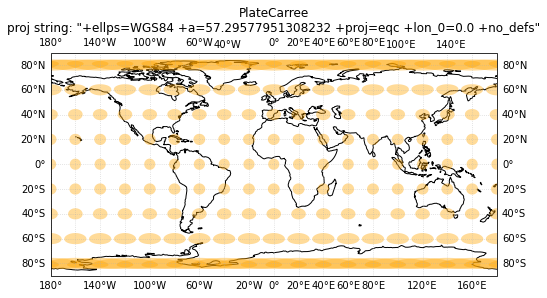

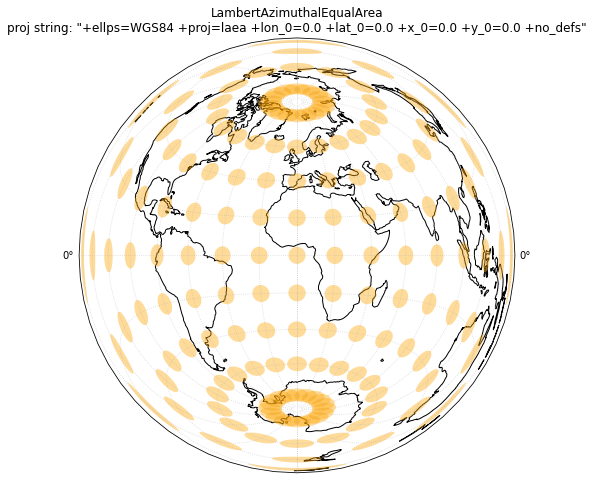

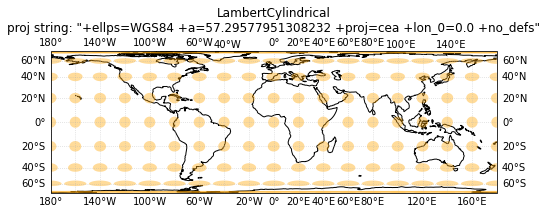

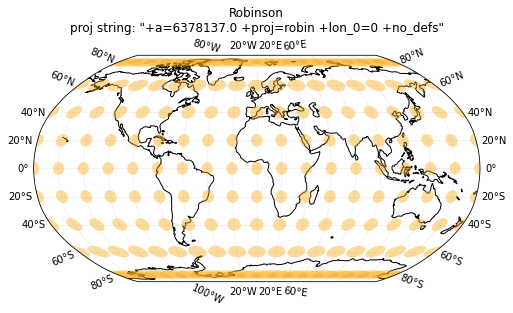

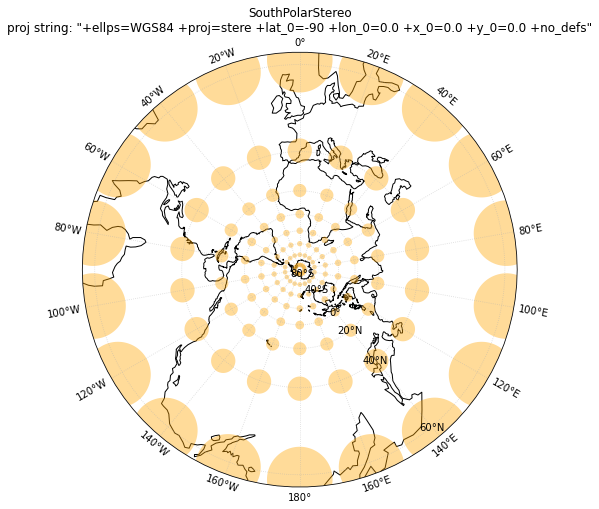

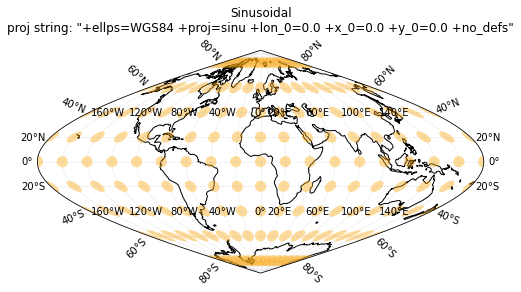

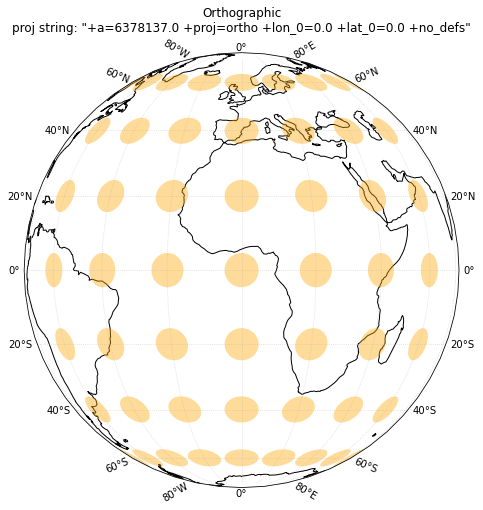

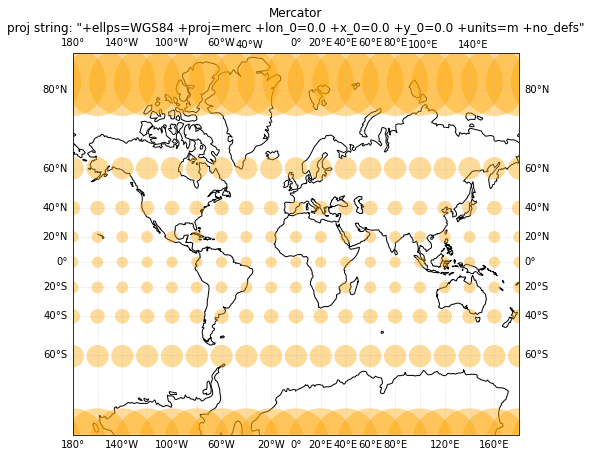

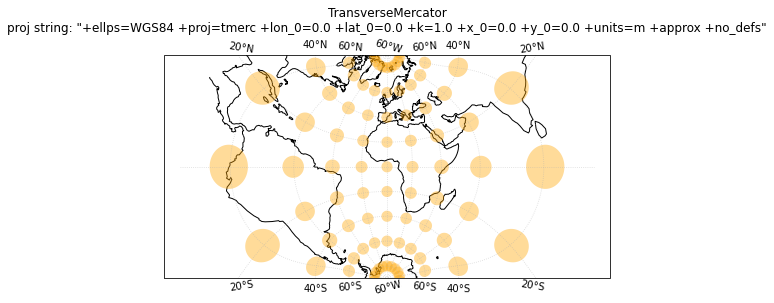

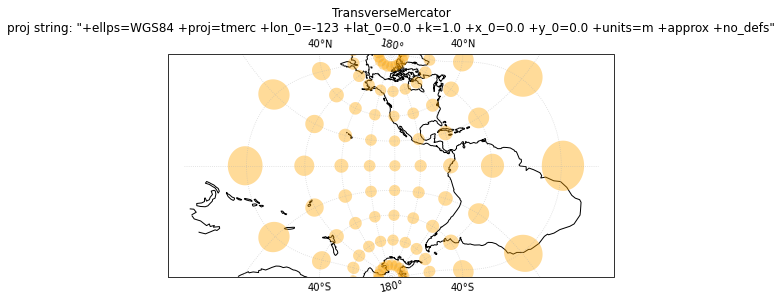

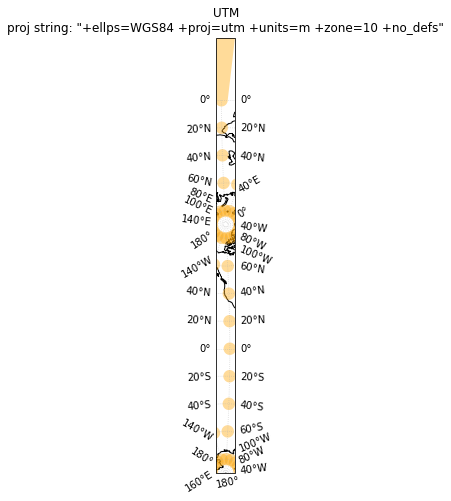

In [5]:
for crs in crs_list:
    tissotplot(crs);

## OK, those are nice.
## Now look at them, read a bit about the different projections, and discuss the following with your neighbor
* Which of the above projection has the greatest area distortion?  How can you tell?
    * If you skipped the link earlier, maybe go back and read about what the Tissot circles mean :)
* Which has greatest azimuthal distortion?

This might be a useful resource: https://www.esri.com/arcgis-blog/products/product/mapping/tissots-indicatrix-helps-illustrate-map-projection-distortion/

* Check out: https://bl.ocks.org/syntagmatic/ba569633d51ebec6ec6e and https://www.jasondavies.com/maps/transition/ for interactive visualizations
* Also, https://xkcd.com/977/

### We will regroup and discuss interpretations as a group